In [1]:
import pandas as pd
import numpy as np

In [23]:
dfAll = pd.read_pickle('dfAll')
df = dfAll['lbl']

In [291]:
select = ['beef', 'meat', 'tallow']
dfSet = df.loc[(df[select]==1).any(axis=1),:]
dfSet[select]

names,beef,meat,tallow
3573,0,1,0
3272,1,0,0
3273,1,0,0
3716,0,1,0
3259,0,1,0
4172,0,1,0
3300,0,1,0
3451,0,1,0
4005,0,1,1
3555,0,1,0


In [295]:
dfSet = dfSet.loc[:, (dfSet == 1).any(axis=0)]
dfSet.columns

Index(['beef', 'black', 'box', 'broth', 'cat', 'cereal', 'chees', 'citrus',
       'cocoa', 'coffe', 'cook', 'currant', 'earth', 'fat', 'floral', 'fri',
       'garlic', 'gravi', 'green', 'hazelnut', 'leek', 'meat', 'nut', 'onion',
       'orang', 'peel', 'penetr', 'potato', 'pungent', 'roast', 'savori',
       'seafood', 'soup', 'sulfur', 'tallow', 'thiamin', 'tree'],
      dtype='object', name='names')

In [357]:
def plotSparce(df, figsize=(30,10)):
    plt.clf
    fig = plt.figure(figsize=figsize, facecolor='white')
    plt.spy(df, aspect='auto')
    ax = fig.get_axes()[0]
    ax.set_xticks(range(len(df.columns)))
    ax.set_xticklabels(list(df.columns), rotation=45)
    ax.set_yticks(range(len(df.index)))
    ax.set_yticklabels(list(df.index))
    ax.grid(color='grey', linestyle='--', linewidth=0.5)
    plt.show()

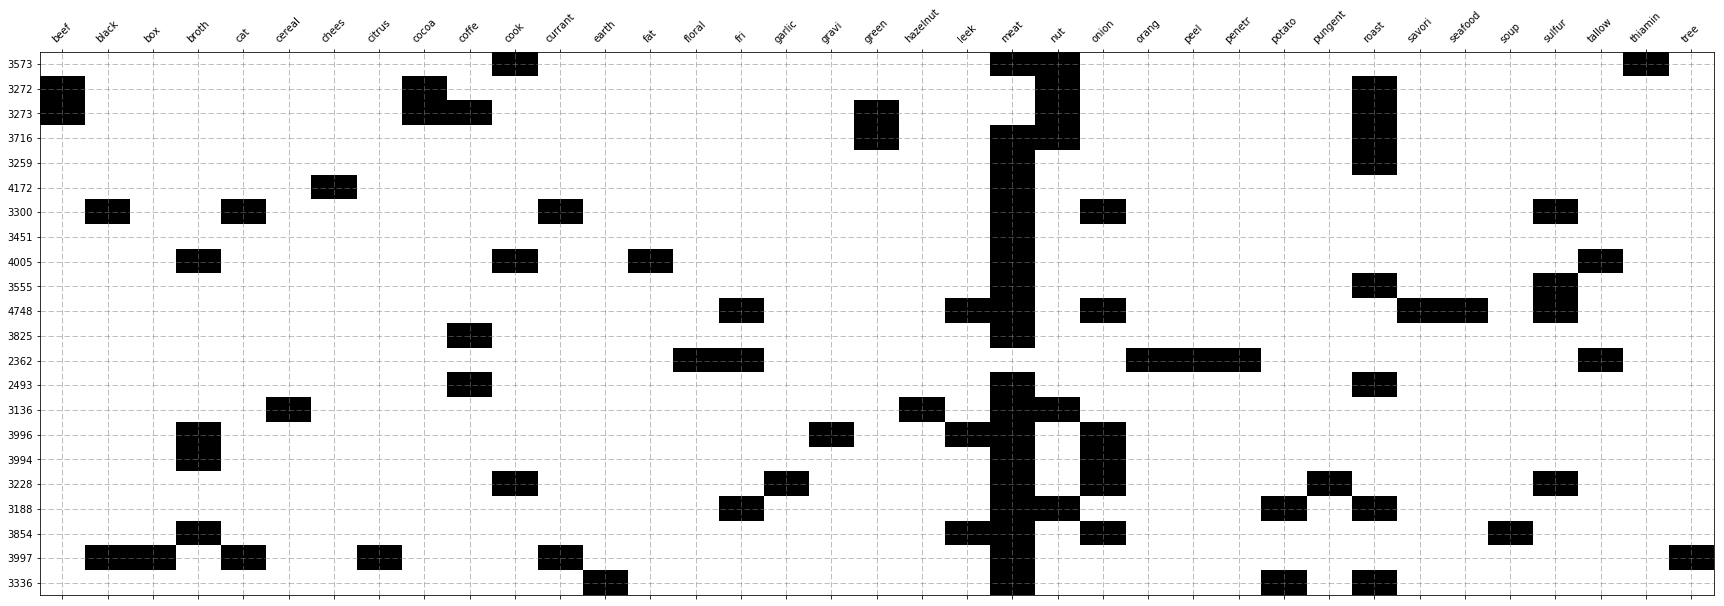

In [381]:
plotSparce(dfSet)

In [361]:
dfMeat = df.loc[(df['meat']==1),:]
dfMeat = df.loc[:, (dfMeat==1).any(axis=0)]
dfMeat = dfMeat.loc[(dfMeat == 1).any(axis=1),:]
dfMeat.shape[0]/df.shape[0]
#plotSparce(dfMeat)

0.39501590668080594

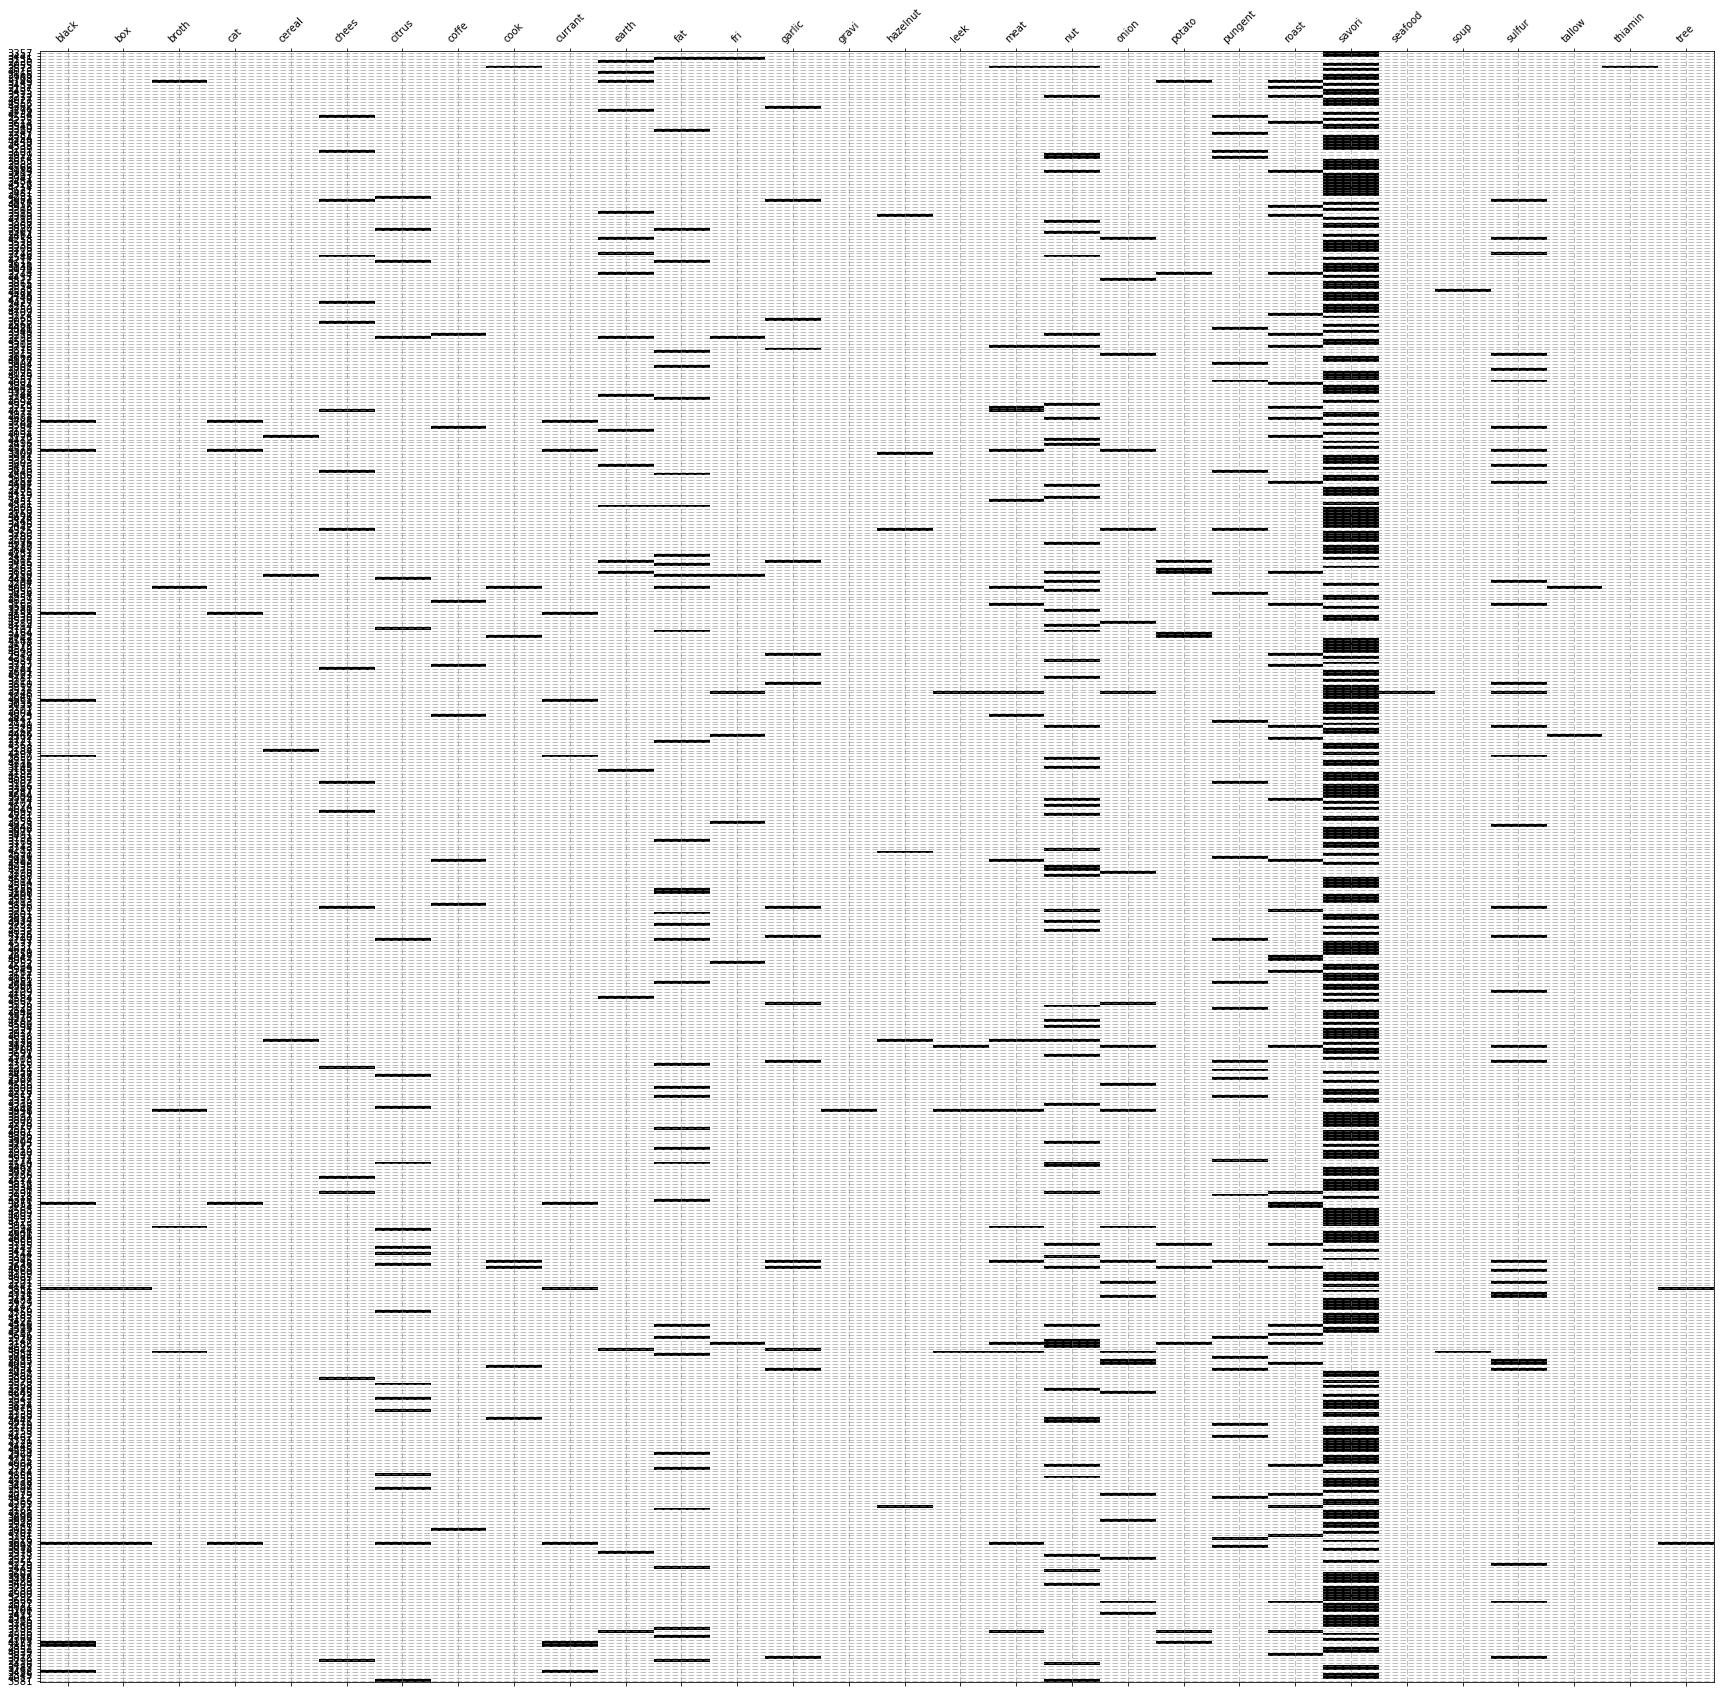

In [383]:
noGreen = list(dfMeat.columns)
noGreen.remove('green')
dfMeatNoGreen = df.loc[(df[noGreen]==1).any(axis=1), noGreen]
dfMeatNoGreen.shape[0]/df.shape[0]
plotSparce(dfMeatNoGreen, (30,30))

In [384]:
dfMeatNoGreen.shape[0]/df.shape[0]

0.29745493107104987

In [427]:
newC = pd.Series(np.zeros(dfData.shape[0], dtype=int), index = dfData.index)
for i in dfMeatNoGreen.index:
    newC.set_value(i,1)
dfMeatData = dfData.assign(lbl=newC)
dfMeatData.head(1)

names,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_priamide,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,lbl
2368,3.007845,154.814331,12.062632,11.094671,11.094671,7.80806,6.96469,6.96469,4.445344,4.445344,...,0,0,0,0,0,0,0,7,0,0


In [468]:
X = dfMeatData.drop('lbl', axis=1).values
y = dfMeatData['lbl']

In [469]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [471]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc.fit(X)
X_std = sc.transform(X)

In [445]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state = 0, gamma=0.001, C=1)
svm.fit(X_train_std, y_train)
y_pred_SVM = svm.predict(X_test_std)
print('Accuracy: {:.2f}' .format(accuracy_score(y_test, y_pred_SVM)))

Accuracy: 0.85


In [479]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

# Set up possible values of parameters to optimize over
p_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100],
          "gamma": [0.0001, 0.001, .01, .1, 0, 1]}

# We will use a Support Vector Classifier with "rbf" kernel
svr = SVC(kernel="rbf")

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
# E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
inner_cv = KFold(n_splits=4, shuffle=True, random_state=12)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=12)

# Non_nested parameter search and scoring
clf = GridSearchCV(estimator=svr, param_grid=p_grid, cv=inner_cv)
clf.fit(X_std, y)
print(clf.best_score_)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
print(nested_score.mean())

0.834570519618
0.802745690741


In [481]:
clf.best_params_

{'C': 10, 'gamma': 0.001}

In [483]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="rbf", C=10, gamma=0.001)

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=KFold(n_splits=4, shuffle=True, random_state=12),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

ValueError: coef_ is only available when using a linear kernel

Automatically created module for IPython interactive environment
Average difference of 0.007742 with std. dev. of 0.007688.


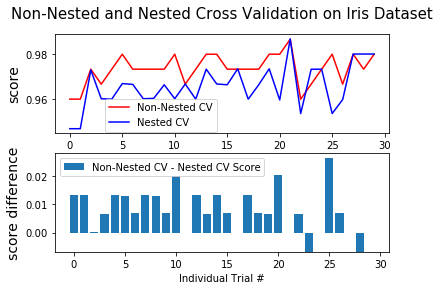

In [447]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

print(__doc__)

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svr = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svr, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

Optimal number of features : 3


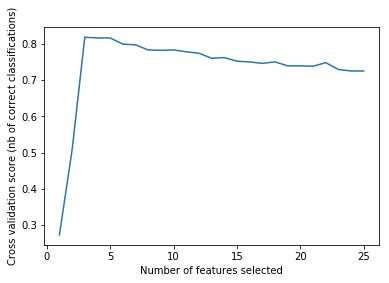

In [482]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [448]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

# THIS IS OLD STUFF

In [25]:
meatList = list(df[df['meat']==1].index)
beefList = list(df[df['beef']==1].index)
tallowList = list(df[df['tallow']==1].index)
meatIndices = list(set(meatList+beefList+tallowList))
len(meatIndices)

22

In [188]:
from sklearn.cluster import KMeans
X = df.values
totalLabels = len(df.columns)
nums = []
unities = []
distortions = []

for num in range(50, 0, -1):
    #find groups in the data
    kmeans = KMeans(n_clusters=num, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
    kmeans.fit(X)
    #match groups with femanumbers
    dfTest = pd.DataFrame(kmeans.labels_, index = df.index)
    
    ###find labels for the meat compounds
    meatGroups = dfTest.loc[meatIndices].values.T
    meatGroups = meatGroups.tolist()[0]
    #unity is how many different groups have a meat compound
    unity = len(set(meatGroups))
    
    #get distortions (cost of the fit)
    distortion = kmeans.inertia_
    distortions.append(distortion)
    
    nums.append(num)
    unities.append(unity)
    if num%5 == 0:
        print(num, end='')
    else:
        print('.', end='')

50....45....40....35....30....25....20....15....10....5....

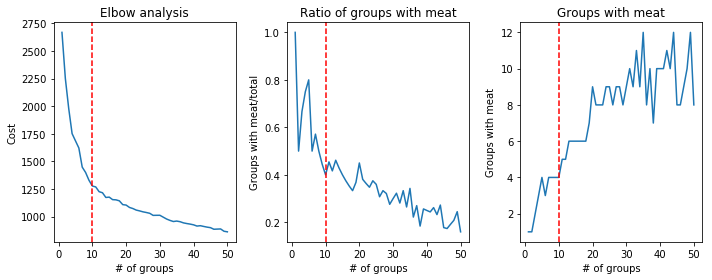

In [189]:
import matplotlib.pyplot as plt

ratios = np.array(unities)/np.array(nums)

fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(131)
ax1.plot(nums, distortions)
ax1.set_title('Elbow analysis')
ax1.set_xlabel('# of groups')
ax1.set_ylabel('Cost')
ax1.axvline(x=10, c='r', ls='--')

ax2 = fig.add_subplot(132)
ax2.plot(nums, ratios)
ax2.set_title('Ratio of groups with meat')
ax2.set_xlabel('# of groups')
ax2.set_ylabel('Groups with meat/total')
ax2.axvline(x=10, c='r', ls='--')

ax3 = fig.add_subplot(133)
ax3.plot(nums, unities)
ax3.set_title('Groups with meat')
ax3.set_xlabel('# of groups')
ax3.set_ylabel('Groups with meat')
ax3.axvline(x=10, c='r', ls='--')

plt.tight_layout()
plt.show()

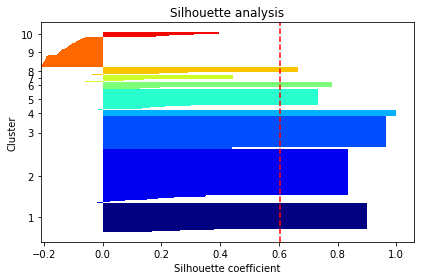

In [191]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=10, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.title('Silhouette analysis')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

In [192]:
sum(sum(X))/(X.shape[0]*X.shape[1])

0.0064990781605452717

In [199]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(df.values, method='complete', metric='cityblock')
pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])]).head(3)

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,2.0,0.0,2.0
cluster 2,196.0,594.0,0.0,2.0
cluster 3,1570.0,1887.0,0.0,3.0


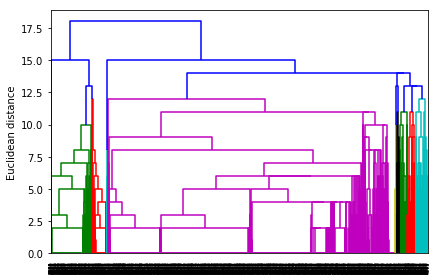

In [204]:
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

plt.clf
row_dendr = dendrogram(row_clusters, 
                       labels=df.index,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.figure(num=1, figsize=(12, 8))
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.savefig('dendrogram.png', dpi=300, 
            bbox_inches='tight')
plt.show()

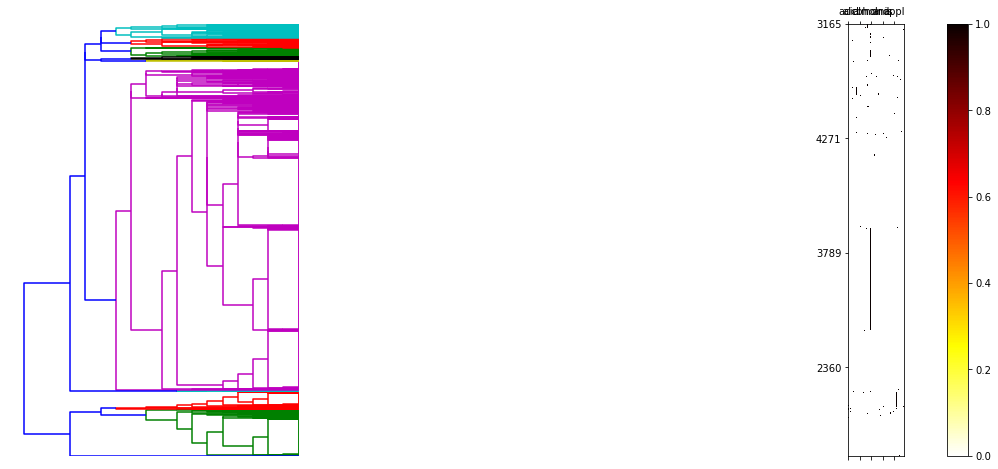

In [240]:
# plot row dendrogram
fig = plt.figure(figsize=(20,10), facecolor='white')
axd = fig.add_axes([0.09,0.1,0.2,0.6])

row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

for i in axd.spines.values():
        i.set_visible(False)

axm = fig.add_axes([0.23,0.1,0.6,0.6]) # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

plt.show()

In [130]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [131]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 402


In [136]:
from sklearn.metrics import accuracy_score

print('Accuracy: {:.2f}' .format(accuracy_score(y_test, y_pred)))

Accuracy: 0.29


In [137]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [140]:
y_pred_LR = lr.predict(X_test_std)
print('Accuracy: {:.2f}' .format(accuracy_score(y_test, y_pred_LR)))

Accuracy: 0.39


In [155]:
y_pred_SVM = svm.predict(X_test_std)
print('Accuracy: {:.2f}' .format(accuracy_score(y_test, y_pred_SVM)))

Accuracy: 0.42


In [156]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [157]:
y_pred_F = forest.predict(X_test_std)
print('Accuracy: {:.2f}' .format(accuracy_score(y_test, y_pred_F)))

Accuracy: 0.17


In [160]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=18, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')

In [161]:
y_pred_KNN = knn.predict(X_test_std)
print('Accuracy: {:.2f}' .format(accuracy_score(y_test, y_pred_KNN)))

Accuracy: 0.40


In [165]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train_std, y_train)                         

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [166]:
y_pred_NN = clf.predict(X_test_std)
print('Accuracy: {:.2f}' .format(accuracy_score(y_test, y_pred_NN)))

Accuracy: 0.36


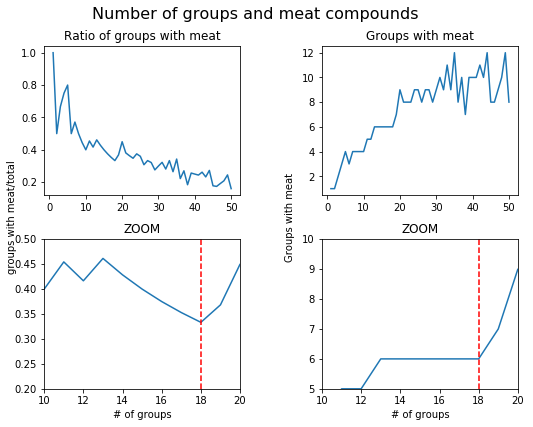

In [183]:
plt.clf

fig = plt.figure(figsize=(8, 6))
fig.suptitle('Number of groups and meat compounds', fontsize=16, y=1.02)

# The big subplots
ax1 = fig.add_subplot(121, frameon=False)
ax1.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax1.set_title('Ratio of groups with meat')
ax1.set_xlabel('# of groups')
ax1.set_ylabel('groups with meat/total', x=1.1)

ax2 = fig.add_subplot(122, frameon=False)
ax2.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax2.set_title('Groups with meat')
ax2.set_xlabel('# of groups')
ax2.set_ylabel('Groups with meat')

# The small subplots
ax1a = fig.add_subplot(221)
ax1a.plot(nums, ratios)
ax2a = fig.add_subplot(222)
ax2a.plot(nums, unities)
ax1b = fig.add_subplot(223)
ax1b.plot(nums, ratios)
ax1b.axvline(x=18, c='r', ls='--')
ax1b.axis([10, 20, 0.2, 0.5])
ax1b.set_title('ZOOM')
ax2b = fig.add_subplot(224)
ax2b.plot(nums, unities)
ax2b.axvline(x=18, c='r', ls='--')
ax2b.axis([10, 20, 5, 10])
ax2b.set_title('ZOOM')

fig.tight_layout()

plt.show()